## 회귀 연습문제

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# import warnings
# warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
insurance_df = pd.read_csv('./data/insurance.csv')
insurance_df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [ ]:
# 데이터 개요 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# sex, region, smoker 범주별 수 확인

sex
male      676
female    662
Name: count, dtype: int64

smoker
no     1064
yes     274
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [ ]:
# 문자 카테고리 변수를 숫자로 인코딩 필요
# 트리 계열 분류 알고리즘과 달리 회귀 알고리즘에서는 숫자 크기가 영향을 미친다 
# 레이블 인코딩 한 0, 1, 2, 3인 경우 큰 수치 2, 3을 더 중요한 값으로 생각해서 가중치를 주기 때문 예측 결과가 달라질 수 있음
# 그래서 레이블 인코딩 방식이 아닌 원핫 인코딩 방식 사용해야 함

# 원핫 인코딩 방식 방법1
# 레이블 인코딩 + 원핫 인코딩
# pd.get_dummies() 사용 

In [ ]:
# pd.get_dummies() 사용해서 인코딩 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   int32  
 5   sex_male          1338 non-null   int32  
 6   smoker_no         1338 non-null   int32  
 7   smoker_yes        1338 non-null   int32  
 8   region_northeast  1338 non-null   int32  
 9   region_northwest  1338 non-null   int32  
 10  region_southeast  1338 non-null   int32  
 11  region_southwest  1338 non-null   int32  
dtypes: float64(2), int32(8), int64(2)
memory usage: 83.8 KB


<Figure size 1000x1000 with 0 Axes>

<Axes: >

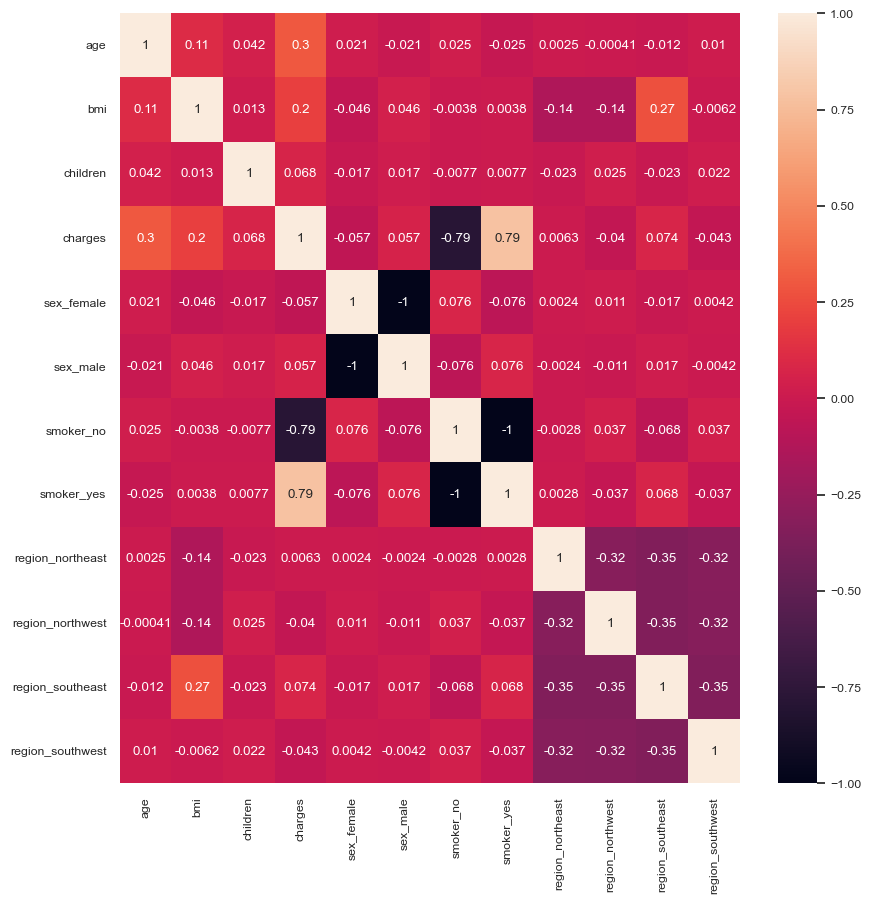

In [ ]:
# 히트맵 사용해서 피처간 상관관계 확인 

# df_corr

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)

plt.show()

# charges(보험료)와 상관관계가 있는 피처 정리
# smoker_yes :
# smoker_no : 
# age , bmi 

In [9]:
# 타깃값 데이터 세트
y_target = insurance_df['charges']

# 피처값 데이터 세트
X_data = insurance_df.drop('charges', axis=1)

In [10]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X_data ,
                                                       y_target ,
                                                       test_size=0.3, 
                                                       random_state=156)

In [ ]:
# 예측 모델 생성 / 학습 / 예측
from sklearn.linear_model import LinearRegression



LinearRegression()

In [ ]:
# 모델 평가 : MSE / RMSE / R 제곱

from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# rmse 구하기 : 방법1

# rmse # 4.158956107955701

# rmse 구하기 : 방법2
# (1) mse 구하고 (2) np.sqrt() 함수 사용


# R 제곱: r2_score() 사용


# 평가 지표 출력
print(f"MSE : {mse:.4f}, RMSE : {rmse:.4f}")
print(f"R제곱 : {r2:.4f}")

# MSE : 34728600.2797, RMSE : 5893.0977
# R제곱 : 0.7313

# RMSE : 5893.0977 너무 높은 수치 
# R제곱 : 0.7313 적당한 수치 

MSE : 34728600.2797, RMSE : 5893.0977
R제곱 : 0.7313


In [13]:
# 실제값과 예측값의 평균 확인
y_test.mean()
y_pred.mean()

12256.304192761196

12348.927302049631

In [ ]:
# 절편과 회귀 계수 값 확인
lr_reg = LinearRegression()
lr_reg.fit(X_test,y_test)

# 절편과 회귀 계수 값 확인
print("절편 값 : ", )
print("회귀 계수 값 : ", np.round(, 1))

# coef_ 속성은 회귀 값만 가지고 있으므로 
# 회귀값을 피처별로 매칭시키고
# 내림차순 정렬해서 확인 
# 시리즈(값, index).정렬(내림차순)

coef_feat = pd.Series(np.round(, 1), index=X_train.columns).sort_values(ascending=False)
coef_feat

LinearRegression()

절편 값 :  2266.275444306282
회귀 계수 값 :  [   256.1    248.5    463.    -162.5    162.5 -12219.8  12219.8    594.5
     93.1   -566.2   -121.4]


smoker_yes          12219.8
region_northeast      594.5
children              463.0
age                   256.1
bmi                   248.5
sex_male              162.5
region_northwest       93.1
region_southwest     -121.4
sex_female           -162.5
region_southeast     -566.2
smoker_no          -12219.8
dtype: float64

In [ ]:
# 교차 검증 진행 : cv=5
from sklearn.model_selection import cross_val_score

# 5개 Fold 셋으로 MSE 구함 
neg_mse_scores = 

# neg_mean_squared_error가 음수값으로 반환되므로 -1을 곱해서 사용
# RMSE는 np.sqrt() 사용
rmse_scores = 
avg_rmse = 

# 평가 지표 출력
print('5 Folds 교차검증 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 Folds 교차검증 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 Folds 교차검증 평균 RMSE : ', np.round(avg_rmse, 3))


5 Folds 교차검증 개별 Negative MSE scores :  [-37065146.66 -38121880.55 -32572832.89 -39681281.46 -37125506.89]
5 Folds 교차검증 개별 RMSE scores :  [6088.12 6174.29 5707.26 6299.31 6093.07]
5 Folds 교차검증 평균 RMSE :  6072.409


In [ ]:
# 피처값에 표준 스케일링 적용 후 모델링 수행
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 표준 스케일링 코드 추가

X_train , X_test , y_train , y_test = train_test_split(X_data_scaled,
                                                       y_target,
                                                       test_size=0.3, 
                                                       random_state=156)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
y_pred = lr_reg.predict(X_test)


rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# R제곱 : r2_score() 사용
r2 = r2_score(y_test, y_pred)

# 평가 지표 출력
print(f"MSE : {mse:.4F}, RMSE : {rmse:.4f}")
print(f"R제곱 : {r2:.4f}")

# 표준 스케일링 적용 전
# MSE : 34728600.2797, RMSE : 5893.0977
# R제곱 : 0.7313

# 표준 스케일링 적용 후
# MSE : 34771830.2694, RMSE : 5896.7644
# R제곱 : 0.7310

# 표준 스케일링 전/후 거의 차이 없음

LinearRegression()

MSE : 34771830.2694, RMSE : 5896.7644
R제곱 : 0.7310


<Axes: xlabel='charges', ylabel='Count'>

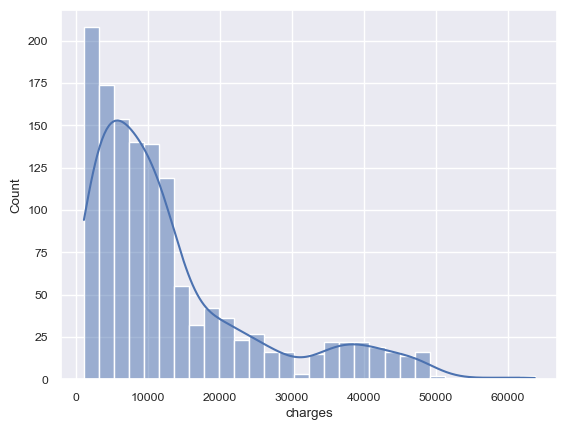

In [ ]:
# 타겟값 분포 확인

plt.show()

# 타깃값의 분포도 확인 결과 상당히 왼쪽으로 치워져있음 
# -> 로그 변환 수행 필요

<Axes: xlabel='charges', ylabel='Count'>

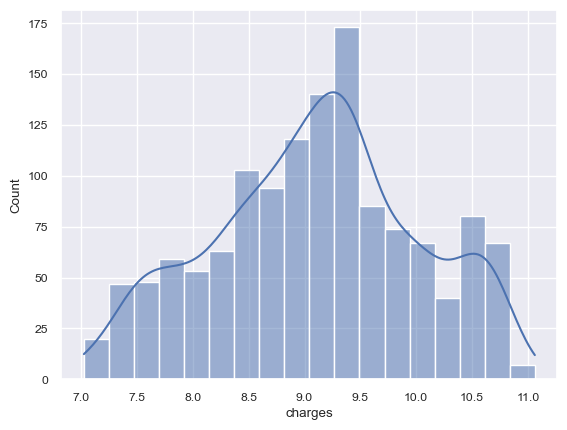

In [ ]:
# 타깃값 로그 변환 수행 후 그래프 확인

plt.show()
# 로그 변환 수행 후 정규분포에 가까운 분포를 보임

In [ ]:
# 로그 변환된 타깃값으로 데이터 세트 분리하고 모델링 수행

# 피처값 : 표준 스케일링 적용
# 타깃값 : 로그 변환 수행 


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 피처에 표준 스케일링 적용


# 타깃값 로그 변환 수행 


# 데이터 세트 분리
X_train , X_test , y_train , y_test = train_test_split(X_data_scaled ,
                                                       y_target_log,
                                                       test_size=0.3, 
                                                       random_state=156)
# 모델 생성/학습/예측
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
y_pred = lr_reg.predict(X_test)

# 모델 평가
rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# R제곱 : r2_score()
r2 = r2_score(y_test, y_pred)

# 평가지표출력
print(f"MSE : {mse:.4f}, RMSE : {rmse:.4f}")
print(f"R제곱 : {r2:.4f}")

# 표준 스케일링 적용 / 로그변환은 수행하지 않은 경우
# MSE : 34771830.2694, RMSE : 5896.7644
# R제곱 : 0.7310


# 타깃값 로그변환 수행 후 결과
# MSE : 0.1903, RMSE : 0.4362
# R제곱 : 0.7713

# RMSE : 0.4362로 엄청 향상되었고 
# # R제곱 : 0.7310 -> 0.7713로 약간 상승되었음 확인 

LinearRegression()

MSE : 0.1903, RMSE : 0.4362
R제곱 : 0.7713
